<a href="https://colab.research.google.com/github/wei-jun7/Project-MI-and-AI/blob/main/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1 (10 points): Describe a machine learning problem that you would like to solve using
Logistic Regression. Clearly state why Logistic regression is the best choice for solving this
problem

The Machine learing problem I want to solove is apple Apple Quality which it is a binary classification. There have 7 feature to affect the quality of the apple, such as size, Weight, Sweetness and so on. The most important thing is  the Quality is the binary with it is 0 or 1. 1 for good and 0 for bad. As the logistic regression the result require between 0 to 1 which our data is best fit on it. Moreover, it goes beyond mere classification by estimating the likelihood of each category, offering a nuanced view of results, especially useful for apples that don't clearly fall into one group. Additionally, the model's interpretability is a key strength. It clearly indicates which characteristics most significantly impact apple quality, making logistic regression not only effective but also insightful for this classification challenge.



Task 2 (20 points): Pick a publicly available dataset (except The Titanic Dataset) that you will
use to solve this problem. You must provide a link to the dataset and perform the necessary
Exploratory Data Analysis (EDA). Clearly demonstrate the steps you follow for your EDA with a
justification of why these were required. For example, if the dataset has lot of missing values,
then why did you use a specific technique when handling missing data. This task may include
data visualization

In [244]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/apple_quality.csv')



The first step is read the data into the vector array which I will use the pandas to do it.

In [245]:

data.isna().sum()  # As we can see the last one is empty so we should remove it.
print(data.shape)
row = data.iloc[4000]
print(row)
data = data.iloc[:4000]
print(data.shape)

data = data.iloc[:4000,:]
data.describe()



(4001, 9)
A_id                                         NaN
Size                                         NaN
Weight                                       NaN
Sweetness                                    NaN
Crunchiness                                  NaN
Juiciness                                    NaN
Ripeness                                     NaN
Acidity        Created_by_Nidula_Elgiriyewithana
Quality                                      NaN
Name: 4000, dtype: object
(4000, 9)


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


The Second step find any NAN data in the dataset I found out the last row is use for author name with we should delete this row which affect the model accuracy. I use the the iloc to remove it and use the describe() function to see summary of each feature.

Index(['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity', 'Quality'],
      dtype='object')


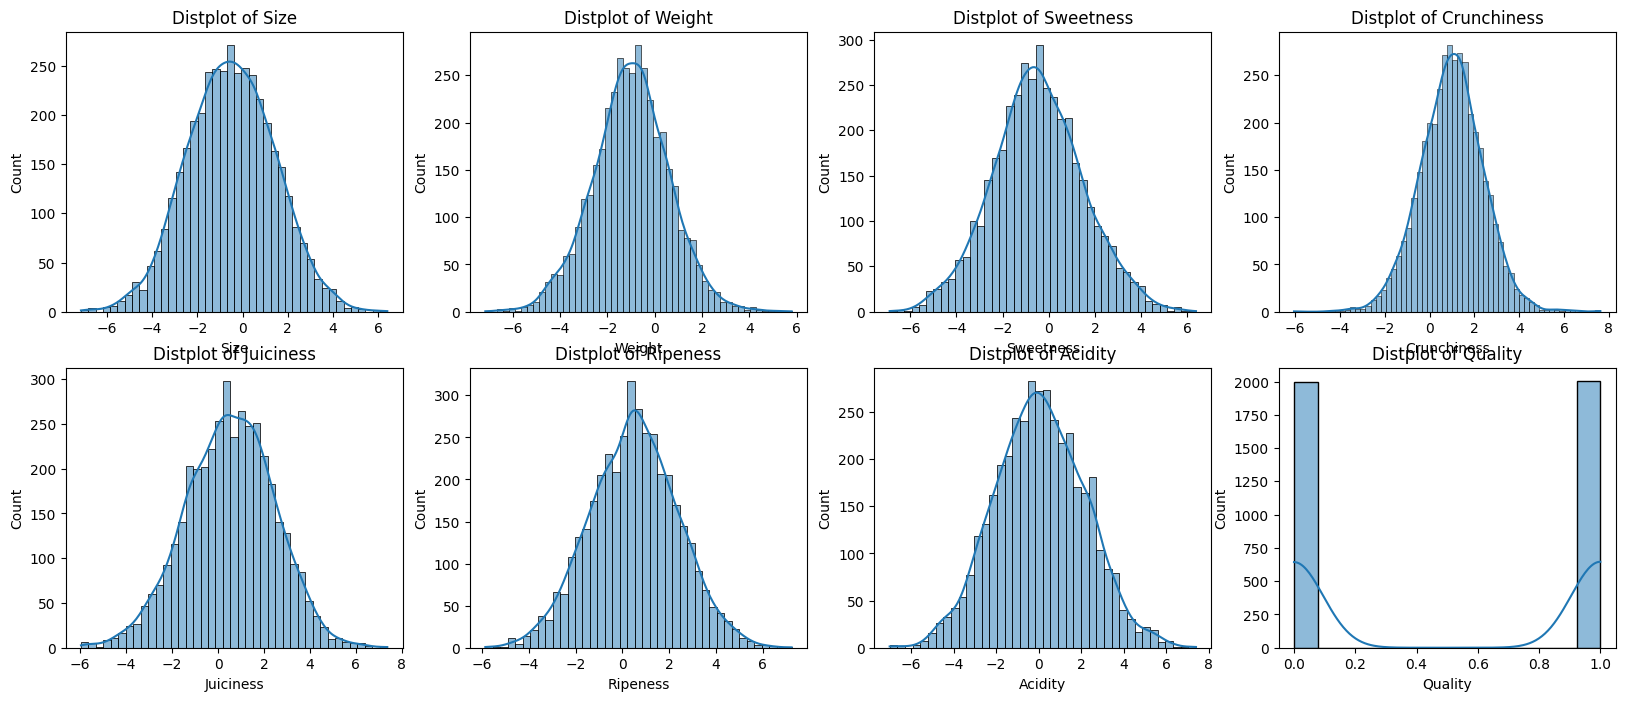

In [246]:
print(data.columns)
data['Quality'] = np.where(data['Quality'] == 'good',1,0)
data = data.drop(labels='A_id',axis=1)# as we know the id number should not be the model with with affect the model accuracy
type(data['Acidity'][0])
data['Acidity']=data['Acidity'].astype(float)#it origin is str but we should change to float with let it show in the graph
fig, axs=plt.subplots(nrows=2,ncols=4,figsize=(20,8))
axs = axs.flatten()
for i, column in enumerate(data.columns):
    sns.histplot(data[column], kde=True, ax=axs[i])
    axs[i].set_title(f'Distplot of {column}')


I remove the A_id with it indicate each sample in our dataset but it is not import with we have the row to indicate the each sample. Next, I creat the each feature to see the disturbution. As we can see most all the feature expect the quality have the normal disturbution. It is a good sign with indicate our model can handel the target value with good quality and bad quality. Also, I notice that in the quality column, I tranfer good to 1 and bad to 0 which it is help us to the do the binary regression.

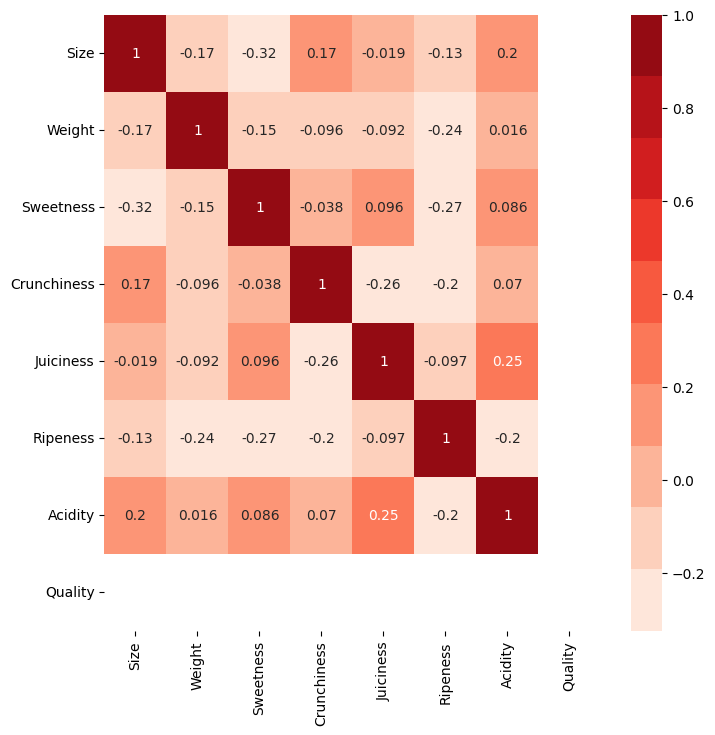

In [247]:
data['Quality'] = np.where(data['Quality'] == 'good',1,0)
data_cor = data.corr()
plt.figure(figsize=(8,8))
cmap_rb = sns.color_palette("Reds", 10)
sns.heatmap(data_cor,cmap=cmap_rb,annot=True)
plt.show()

I creat the one heat map to see the each feature relationship with we can see teh the strongest postive relationship is size and acidity which mean that the size bigger the acidity stronger. The strongest negtive realtionis is size and sweetness which bigger size less sweetness. In overall, each feature is not have strong relationship which it better to use the logistic regression to find out the relationship between each feature.

Task 3 (25 points): Implement, Logistic Regression in this step. Clearly write your cost function
and derivatives before implementing gradient descent. Do not use any built-in packages for this
step. You can use the vectorization techniques demonstrated in class. Implement any 2 variants
of gradient descent in their original form. (Refer to the research paper discussed in class).


In [248]:
import numpy as np

def sigmoid(z):#active function


    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):
    m = y.size
    h = sigmoid(X.dot(theta))
    cost = -1/m * (np.dot(y, np.log(h)) + np.dot(1 - y, np.log(1 - h)))# cross Entropy loss
    return cost

def batch_gradient_descent(X, y, theta, alpha, iterations):
    m = y.size
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        h = sigmoid(X.dot(theta))
        gradient = (1/m) * X.T.dot(h - y)
        theta -= alpha * gradient
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history


# Data preprocessing

dataset = data.to_numpy()


X = dataset[:, :-1]
y = dataset[:, -1]
split_size = int(0.8 * len(X))
X_train, X_test = X[:split_size], X[split_size:]
y_train, y_test = y[:split_size], y[split_size:]


# Convert to numpy arrays and reshape if necessary
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Add an intercept term to X_train and X_test
X_train = np.column_stack((np.ones(X_train.shape[0]), X_train))
X_test = np.column_stack((np.ones(X_test.shape[0]), X_test))

# Initialize parameters
theta = np.zeros(X_train.shape[1])
alpha = 0.001
iterations = 1000

# Train the model
theta_final, cost_history = batch_gradient_descent(X_train, y_train, theta, alpha, iterations)

# Output the final parameters and cost history
print("Final theta:", theta_final)
print("Final cost:", cost_history[-1])


Final theta: [-0.34996922  0.14967444  0.25690458  0.12871541 -0.28924534 -0.13428604
 -0.11010055 -0.02915669]
Final cost: 0.3193179803605742


In [249]:
predictions = sigmoid(np.dot(X_test, theta_final)) >= 0.5
accuracy = np.mean(predictions == y_test)
print("Accuracy:", accuracy)


Accuracy: 0.96375


In [250]:
import numpy as np

def sigmoid(z):

    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):
    m = y.size
    h = sigmoid(X.dot(theta))
    cost = -1/m * (np.dot(y, np.log(h)) + np.dot(1 - y, np.log(1 - h)))
    return cost

def stochastic_gradient_descent(X, y, theta, alpha, iterations):
    m = y.size
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        # Shuffle the data for each iteration
        indices = np.arange(m)
        np.random.shuffle(indices)
        X = X[indices]
        y = y[indices]# randomly choice a point to update.

        for i in range(m):
            xi = X[i, :].reshape(1, -1)
            yi = y[i]
            hi = sigmoid(xi.dot(theta))
            gradient = xi.T * (hi - yi)
            theta -= alpha * gradient # updata each time compute the result.

            #record the cost
            cost_history[it] = compute_cost(X, y, theta)

    return theta, cost_history

np.random.seed(0)# make sure each time result can be repeat.
# Data preprocessing
dataset = data.to_numpy()
X = dataset[:, :-1]
y = dataset[:, -1]
split_size = int(0.8 * len(X))
X_train, X_test = X[:split_size], X[split_size:]
y_train, y_test = y[:split_size], y[split_size:]


# Convert to numpy arrays and reshape if necessary
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Add an intercept term to X_train and X_test
X_train = np.column_stack((np.ones(X_train.shape[0]), X_train))
X_test = np.column_stack((np.ones(X_test.shape[0]), X_test))

# Initialize parameters
theta = np.zeros(X_train.shape[1])
alpha = 0.01
iterations = 1000

# Train the model
theta_final, cost_history = batch_gradient_descent(X_train, y_train, theta, alpha, iterations)

# Output the final parameters and cost history
print("Final theta:", theta_final)
print("Final cost:", cost_history[-1])



Final theta: [-1.50812923  0.37810347  0.46075976  0.29920637 -0.62848341 -0.2863944
 -0.14042569 -0.10457217]
Final cost: 0.09425296851298473


In [251]:
predictions = sigmoid(np.dot(X_test, theta_final)) >= 0.5
accuracy = np.mean(predictions == y_test)
print("Accuracy:", accuracy)


Accuracy: 0.9925


So, on the task 3, I make the batch_gradient_descent and stochastic_gradient_descent, As we can see that they heave the similar performance on the accuracy but the cost is different which the stochastice_gradient_descent is less than batch_gradient_descent. Because we know that the batch_gradient_descent is use all data point for one updata but the stochastic_gradient_descent is no, just pick a point for updata which we know it is doing faster than batch_gradient_descent.

Task 4 (45 points): Pick any 2 optimization algorithms that are used to optimize the ‘vanilla’
gradient descent. Implement both. You may implement these algorithms yourself OR use a
package. In your conclusion, compare both optimization techniques/algorithms with respect to
the results you achieve. Also compare these results with the original implementation of
gradient descent (Task 3 above). Describe why we should or why we should not use
optimization algorithms for the task at hand. For comparison of these algorithms define an
evaluation metric appropriate for your problem.

In [257]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np



# make DataFrame transfer NumPy array
dataset = data.to_numpy()
X = dataset[:, :-1]
y = dataset[:, -1]
split_size = int(0.8 * len(X))
X_train, X_test = X[:split_size], X[split_size:]
y_train, y_test = y[:split_size], y[split_size:]

# make NumPy tranfer to  PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# define regression model
def create_model(input_size):
    return nn.Sequential(nn.Linear(input_size, 1), nn.Sigmoid())

model_momentum = create_model(X_train.shape[1])
model_minibatch = create_model(X_train.shape[1])

# define the loss function
criterion = nn.BCELoss()

# defined two train model
optimizer_momentum = optim.SGD(model_momentum.parameters(), lr=0.01, momentum=0.9)
optimizer_minibatch = optim.SGD(model_minibatch.parameters(), lr=0.01)

# use forward and backward to train the modlel
def train_model(model, optimizer, X_train_tensor, y_train_tensor, epochs=100):
    for epoch in range(epochs):
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # if (epoch+1) % 10 == 0:
        #     print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')
    return loss

# calculate the accuracy function
def calculate_accuracy(model, X_test_tensor, y_test_tensor):
    with torch.no_grad():
        outputs = model(X_test_tensor)
        predicted = (outputs > 0.5).float()
        total = y_test_tensor.size(0)
        correct = (predicted == y_test_tensor).sum().item()
        accuracy = 100 * correct / total
        return accuracy

# print out the result
Momentum_loss=train_model(model_momentum, optimizer_momentum, X_train_tensor, y_train_tensor)
print(f"Training with Gradient Descent with Momentum loss: {Momentum_loss:.4f}")
accuracy_momentum = calculate_accuracy(model_momentum, X_test_tensor, y_test_tensor)
print(f"Accuracy with Gradient Descent with Momentum: {accuracy_momentum:.2f}%")

Min_loss = train_model(model_minibatch, optimizer_minibatch, X_train_tensor, y_train_tensor)
print(f"\nTraining with Mini-batch Gradient Descent: {Min_loss:.4f} ")
accuracy_minibatch = calculate_accuracy(model_minibatch, X_test_tensor, y_test_tensor)
print(f"Accuracy with Mini-batch Gradient Descent: {accuracy_minibatch:.2f}%")


Training with Gradient Descent with Momentum loss: 0.0870
Accuracy with Gradient Descent with Momentum: 99.38%

Training with Mini-batch Gradient Descent: 0.3136 
Accuracy with Mini-batch Gradient Descent: 93.75%


 As we can see that they have similar perform on the accuracy which all over the 90% however compare with the cost there have a big differetnt which  the mini-batch gradient descent and batch gradient descent have the similar cost and Gradient descent with momentum and stochastic_gradient_descent have the similar cost. In comaparsion, the Gradient descent with momentum and stochastic_gradient_descent is cost less than other two, one reason is because it not need to make the each updata with all dataset and it can move faster and cost less.



 The reason we use the optimization algorithms beacuse it have faster convergence, computational efficiency and stability and accuracy. In my example, the accuracy that need to updata all table, such as mini-batch gradient descent and batch gradient descent is alway less accuracy than other two, one reason for it is the noisy in the table have affect on accuracy and the cost of mini-batch gradient descent and batch gradient descent is stronger than other two.

 The reason we not use the optimization algorithms because Complexity and Overfitting Risk. one reason for it because each time they will pick a radom point to use for the model. it maybe reuduce the noisy but increase the overfitting. Another reason is my dataset is a small dataset and clear which differnet of real case. those model will amplify the noisy to affect to the result.

 In summary, while optimization algorithms can significantly improve the performance of gradient descent, the choice of algorithm should be aligned with the specific requirements and constraints of the task, such as data size, problem complexity, and available computational resources. For tasks with large datasets, Mini-batch Gradient Descent can be particularly useful, whereas Gradient Descent with Momentum might be more suitable for scenarios where a smoother convergence is desired.